In [1]:
import torch
import torch.nn as nn
import torchvision

In [3]:
class CNNModel(nn.Module):
    def __init__(self, num_classes = 10):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3,32, kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        self.block1 = 3 * [
            nn.Conv2d(32,32,kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        ]
        self.pool1 = [nn.MaxPool2d(kernel_size=(2,2))]

        self.block2 = 5 * [
            nn.Conv2d(32,32,kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        ]
        self.pool2 = [nn.MaxPool2d(kernel_size=(2,2))]

        self.block3 = 7 * [
            nn.Conv2d(32,32,kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        ]
        self.avgpool = [nn.AdaptiveAvgPool2d((1,1))]

        self.features = nn.Sequential(
            *self.block1,
            *self.pool1,
            *self.block2,
            *self.pool2,
            *self.block3,
            *self.avgpool,
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32,128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),

            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.features(x)
        return self.fc(x)

In [4]:
model = CNNModel()

In [5]:
model

CNNModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (features): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [6]:
from torchinfo import summary
summary(model.to("cuda"), input_size=(1,3,256,256))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [1, 10]                   --
├─Sequential: 1-1                        [1, 32, 256, 256]         --
│    └─Conv2d: 2-1                       [1, 32, 256, 256]         896
│    └─BatchNorm2d: 2-2                  [1, 32, 256, 256]         64
│    └─ReLU: 2-3                         [1, 32, 256, 256]         --
├─Sequential: 1-2                        [1, 32, 1, 1]             --
│    └─Conv2d: 2-4                       [1, 32, 256, 256]         9,248
│    └─BatchNorm2d: 2-5                  [1, 32, 256, 256]         64
│    └─ReLU: 2-6                         [1, 32, 256, 256]         --
│    └─Conv2d: 2-7                       [1, 32, 256, 256]         (recursive)
│    └─BatchNorm2d: 2-8                  [1, 32, 256, 256]         (recursive)
│    └─ReLU: 2-9                         [1, 32, 256, 256]         --
│    └─Conv2d: 2-10                      [1, 32, 256, 256]     

In [7]:
import numpy as np

def read_pts_file(pts_path):
    with open(pts_path) as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if line.strip() and not line.startswith(('version', 'n_points', '{', '}'))]
        landmarks = np.array([[float(x) for x in line.split()] for line in lines])
    return landmarks  # shape: (68, 2)


In [8]:
from glob import glob
import os

dataset_path = '/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style'

image_paths = sorted(glob(f'{dataset_path}/*/*/*.jpg'))  # or adjust depth as needed
pts_paths = [img_path.replace('.jpg', '.pts') for img_path in image_paths]

# print(f"{image_paths}->{pts_paths}")

# Sanity check
for img, pts in zip(image_paths[:], pts_paths[:]):
    print(img, '->', pts)


/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1051618982_1.jpg -> /media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1051618982_1.pts
/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/111076519_1.jpg -> /media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/111076519_1.pts
/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/111076519_2.jpg -> /media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/111076519_2.pts
/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1130084326_1.jpg -> /media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1130084326_1.pts
/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1130084326_2.jpg -> /media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1130084326_2.pts
/media/miju_chowdhury/Miju/Datasets/300W-Style/300W-Style/300W-Gray/afw/1130084326_3.jpg -> /media/

In [9]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import torch

class LandmarkDataset(Dataset):
    def __init__(self, image_paths, pts_paths, transform=None):
        self.image_paths = image_paths
        self.pts_paths = pts_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        landmarks = read_pts_file(self.pts_paths[idx])  # shape: (68, 2)

        if self.transform:
            image = self.transform(image)

        landmarks = torch.tensor(landmarks, dtype=torch.float32)
        return image, landmarks


In [10]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

dataset = LandmarkDataset(image_paths, pts_paths, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to read .pts files
def read_pts_file(pts_path):
    with open(pts_path) as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if line.strip() and not line.startswith(('version', 'n_points', '{', '}'))]
        landmarks = np.array([[float(x) for x in line.split()] for line in lines])
    return landmarks  # shape: (68, 2)

# Show a few images with landmarks
def show_images_with_landmarks(image_paths, pts_paths, num=5):
    plt.figure(figsize=(18, 12))
    for i in range(num):
        image = Image.open(image_paths[i]).convert('RGB')
        landmarks = read_pts_file(pts_paths[i])

        
        plt.subplot(4,4,i+1)
        plt.imshow(image)
        plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, c='red')
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()


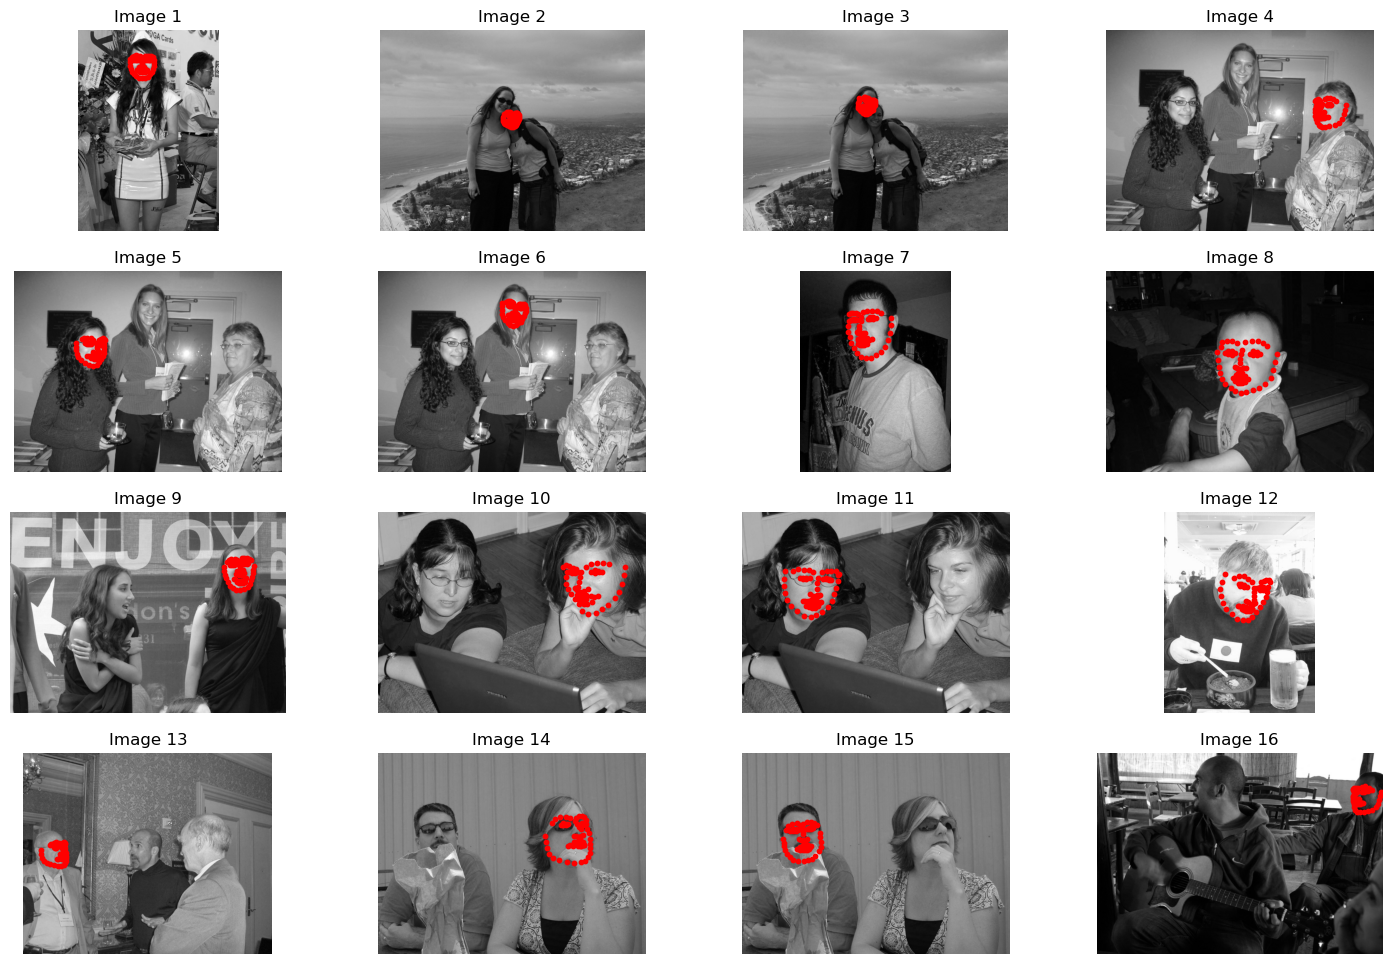

In [12]:
show_images_with_landmarks(image_paths, pts_paths, num=16)


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNLandmarkModel(nn.Module):
    def __init__(self, num_landmarks=68):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        self.block1 = self._make_block(32, 32, num_layers=3)
        self.pool1 = nn.MaxPool2d(2)

        self.block2 = self._make_block(32, 32, num_layers=5)
        self.pool2 = nn.MaxPool2d(2)

        self.block3 = self._make_block(32, 32, num_layers=7)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_landmarks * 2),  # output: (batch_size, 136)
        )

    def _make_block(self, in_channels, out_channels, num_layers):
        layers = []
        for _ in range(num_layers):
            layers.extend([
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            ])
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.block1(x)
        x = self.pool1(x)
        x = self.block2(x)
        x = self.pool2(x)
        x = self.block3(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x.view(x.size(0), -1, 2)  # reshape to (batch_size, 68, 2)


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
from torchvision import transforms
from tqdm import tqdm

In [15]:
model = CNNLandmarkModel(num_landmarks=68)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNLandmarkModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (block1): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride

In [16]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
dataset = LandmarkDataset(image_paths, pts_paths, transform=transform)

In [17]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [18]:
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [19]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [20]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, landmarks in tqdm(dataloader):
        images, landmarks = images.to(device), landmarks.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, landmarks)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(dataloader)

In [21]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for images, landmarks in dataloader:
            images, landmarks = images.to(device), landmarks.to(device)
            outputs = model(images)
            loss = criterion(outputs, landmarks)
            total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model, test_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


  0%|          | 0/1510 [00:00<?, ?it/s]


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])